In [238]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc('figure', figsize = (20,16))

In [239]:
file = pd.ExcelFile('GPS_DATA_Biplot.xlsx', index_col = 0)
ds = file.parse('GPS_DATA_Scat')

In [240]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [241]:
n = len(ds.columns)
pca = PCA(n_components = n)
pca.fit(ds)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [242]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [243]:
xs = pca.transform(ds)[:,0]
ys = pca.transform(ds)[:,1]

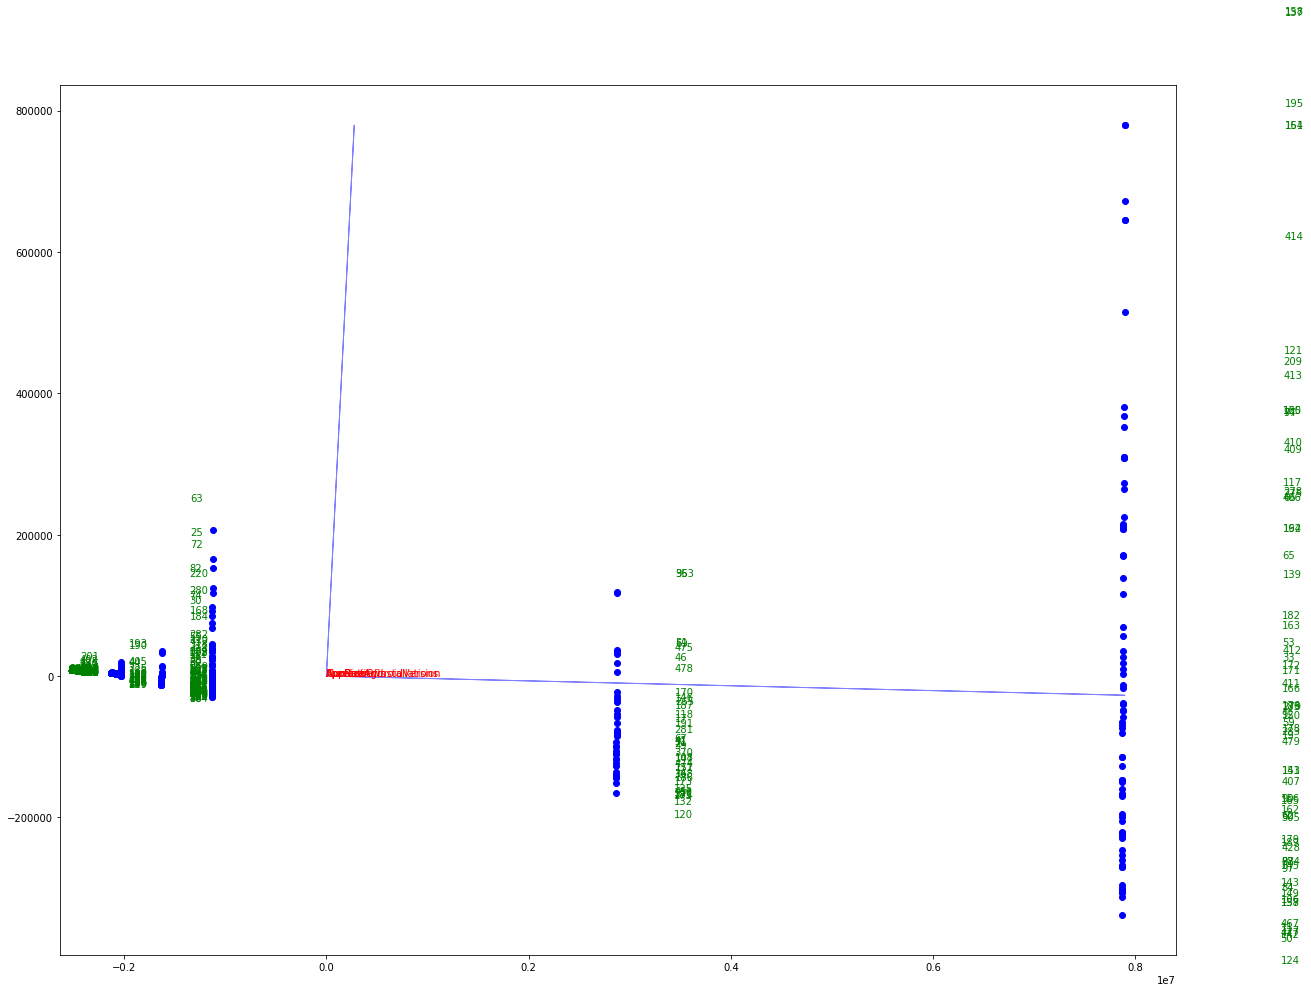

In [244]:
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i] * max(xs), yvector[i] * max(ys), color = 'b', width = 0.0005, head_width = 0.0025, alpha = 0.5)
    plt.text(xvector[i]* 1.2, yvector[i]*1.2,
            list(ds.columns.values)[i], color = 'r')
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(ds.index)[i], color = 'g')
plt.show()